## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata 249x5

In [22]:
#study_results 1893x4

# surveyed the data sets and see that Mouse ID is that common column in which we'd like to merge 

In [23]:
mouse_study_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

In [24]:
# Display the data table for preview

In [25]:
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.

In [27]:
mice_count_all = mouse_study_merge['Mouse ID'].count()
mice_count_all

1893

In [28]:
mice_count = mouse_study_merge['Mouse ID'].unique()
mice_count_unique = len(mice_count)
mice_count_unique

249

In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
####duplicate_init = mouse_study_merge.groupby(['Mouse ID']).count()['Timepoint']
####duplicate_init

duplicates_init = mouse_study_merge.sort_values('Mouse ID')
#duplicates_init
len(duplicates_init)

1893

In [30]:
timepoint_duplicates = duplicates_init.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
len(timepoint_duplicates)

#looks to be successful, as this dropped 5/10 rows -- I'm not sure wheather to pick first, last, keep=False drops all Duplicate rows.

1888

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 

In [32]:
duplicated_timepoints = mouse_study_merge[mouse_study_merge.duplicated(subset=['Mouse ID','Timepoint'])]
duplicated_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
duplicated_timepoints = mouse_study_merge[mouse_study_merge.duplicated()]
duplicated_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [35]:
# Checking the number of mice in the clean DataFrame.
## should be 1888 line items and 249 unique mice here....

In [36]:
clean_data = timepoint_duplicates

In [37]:
len(clean_data)

1888

## Summary Statistics

In [38]:
drug_regimen = clean_data.groupby('Drug Regimen')
#drug_regimen_tumor_vol = drug_regimen.loc['Tumor Volume(mm3)']

drug_regimen
# drug_reg_counts = drug_regimen.count()


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

t_vol_mean = drug_regimen['Tumor Volume (mm3)'].mean()
t_vol_median = drug_regimen['Tumor Volume (mm3)'].median()
t_vol_variance = drug_regimen['Tumor Volume (mm3)'].var()
t_vol_std_dev = drug_regimen['Tumor Volume (mm3)'].std()
t_vol_sem = drug_regimen['Tumor Volume (mm3)'].sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

t_vol_stats = pd.DataFrame({'Tumor Size Mean': round(t_vol_mean,3), 
                           'Tumor Size Median': round(t_vol_median,3),
                           'Tumor Size Variance': round(t_vol_variance,3),
                           'Tumor Size Std Dev': round(t_vol_std_dev,3),
                         'Tumor Size SEM': round(t_vol_sem,3),
                           })
t_vol_stats

,Tumor Size Mean,Tumor Size Median,Tumor Size Variance,Tumor Size Std Dev,Tumor Size SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.389,50.910,43.116,6.566,0.526
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [46]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# drug_regimen2 = clean_data.groupby('Drug Regimen')

# t_vol_stats2 = pd.DataFrame({'Tumor Size Mean': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Median': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Variance': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Std Dev': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#                })
# t_vol_stats2
# This method produces everything in a single groupby function

In [42]:

drug_regimen2 = clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# t_vol_stats2 = pd.DataFrame({'Tumor Size Mean': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Median': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Variance': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#               'Tumor Size Std Dev': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
#                })

drug_regimen2



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.389178  50.909965  43.116372  6.566306  0.525725
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

## pd.plot !!! 


## pandas.plots 
## import as plt 

## this does some of the matplotlib:  plt is matplotlib


In [46]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# regimen_count = clean_data.groupby('Drug Regimen')
# mice_ID_list = regimen_count['Drug Regimen'].unique()
# mice_ID_list

regimen_count = clean_data['Drug Regimen'].value_counts()  ## this agg's number of partiulcar value rather than counting all the rows 
regimen_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

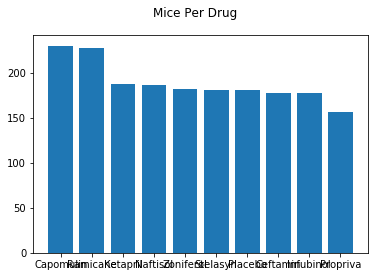

In [67]:
# mice_per_drug = regimen_count.count()['Mouse ID']
#mice_per_drug
#type(mice_per_drug) <-- this is a series 

#### some useful stuff here:
# data = {'a': np.arange(50),
#         'c': np.random.randint(0, 50, 50),
#         'd': np.random.randn(50)}
# data['b'] = data['a'] + 10 * np.random.randn(50)
# data['d'] = np.abs(data['d']) * 100

# plt.scatter('a', 'b', c='c', s='d', data=data)
# plt.xlabel('entry a')
# plt.ylabel('entry b')
# plt.show()





# drugs = mice_ID_list.to_list()


# values = mice_per_drug.to_list()


# plt.figure(figsize=(9, 3))

plt.bar(regimen_count.index.values, height=regimen_count.values)
# #plt.subplot(132)
plt.suptitle('Mice Per Drug')
plt.show()

In [61]:
type(regimen_count)

## df  is a bunch of series'

pandas.core.series.Series

In [62]:
regimen_count.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 156])

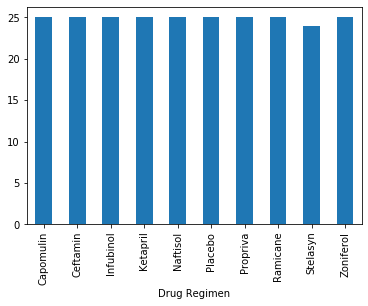

In [50]:
clean_data.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar')
plt.show()

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
